In [2]:
import joblib
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
                                    StratifiedKFold,
                                    cross_validate,
                                    GridSearchCV
                                )
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score,
                            roc_auc_score,
                            roc_curve,
                            precision_recall_curve
                        )

warnings.filterwarnings('ignore')

#### Load the Data

In [3]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

#### Define Multimodels

In [4]:
lr_param_grid = {
    'max_iter' : [1000, 5000, 10000]
}

dt_param_grid = {
    'max_depth' : [8, 12, 16, 20],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

rf_param_grid = {
    'n_estimators' : [100, 150, 200, 300],
    'max_depth' : [8, 12, 16, 20, 50],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

param_grids = {
    'Logistic Regression' : lr_param_grid,
    'Decision Tree' : dt_param_grid,
    'Random Forest' : rf_param_grid
}

In [5]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier()
}

#### Configure k-fold CV

In [6]:
cv = StratifiedKFold(
                    n_splits=6,
                    shuffle=True,
                    random_state=42
                )

#### Multimodel Training

In [7]:
grid_search_results = {}

for model_name, model in models.items():
    print(f'\n---------------Tuning {model_name}----------------')

    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(
                                estimator=model,
                                param_grid=param_grid,
                                cv=cv, scoring='f1',
                                verbose=1, return_train_score=True
                            )
    
    print(f'Fitting gridSearchCV for {model_name}')
    grid_search.fit(X_train, Y_train)
    grid_search_results[model_name] = grid_search

    print(f'{model_name} gridSearchCV completed......')
    print(f'Best parameters : {grid_search.best_params_}')
    print(f'Best CV scores : {grid_search.best_score_}')


---------------Tuning Logistic Regression----------------
Fitting gridSearchCV for Logistic Regression
Fitting 6 folds for each of 3 candidates, totalling 18 fits
Logistic Regression gridSearchCV completed......
Best parameters : {'max_iter': 1000}
Best CV scores : 0.8005231362254244

---------------Tuning Decision Tree----------------
Fitting gridSearchCV for Decision Tree
Fitting 6 folds for each of 12 candidates, totalling 72 fits
Decision Tree gridSearchCV completed......
Best parameters : {'criterion': 'log_loss', 'max_depth': 12}
Best CV scores : 0.8105216233549659

---------------Tuning Random Forest----------------
Fitting gridSearchCV for Random Forest
Fitting 6 folds for each of 60 candidates, totalling 360 fits
Random Forest gridSearchCV completed......
Best parameters : {'criterion': 'log_loss', 'max_depth': 50, 'n_estimators': 300}
Best CV scores : 0.8565414815249984


In [8]:
grid_search_results

{'Logistic Regression': GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
              estimator=LogisticRegression(),
              param_grid={'max_iter': [1000, 5000, 10000]},
              return_train_score=True, scoring='f1', verbose=1),
 'Decision Tree': GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
              estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [8, 12, 16, 20]},
              return_train_score=True, scoring='f1', verbose=1),
 'Random Forest': GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
              estimator=RandomForestClassifier(),
              param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [8, 12, 16, 20, 50],
                          'n_estimators': [100, 150, 200, 300]},
              return_train_score=True, scoring='f1

In [9]:
best_model = grid_search.best_estimator_

In [10]:
Y_hat_test = best_model.predict(X_test)

In [11]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

print(f'Accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1_score : {f1}')

Accuracy : 0.7764371894960965
precision : 0.5767195767195767
recall : 0.5844504021447721
f1_score : 0.5805592543275633


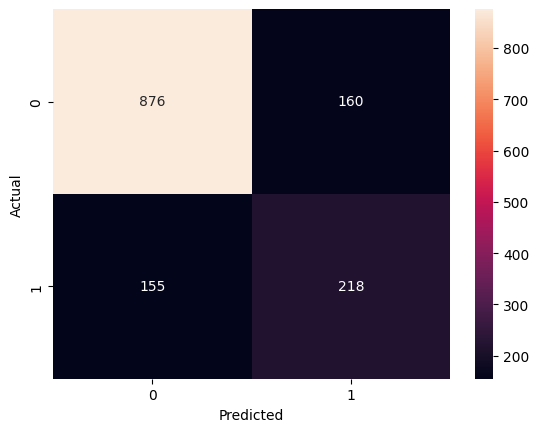

In [12]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()